<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/07_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.4 2 D plots
The images (JPEG, TIFF, PNG etc.) comes in two formats: greyscale or RGB. plt.imshow can be used to show both type of images. First we use imread to read the data from figures, then we make a three dimensional array data by first creating an empty array, and then specifying the each band data in RGB (red, green blue) order. If we are reading an image having all the three bands in a single image, the imread will provide the data as three dimensional array and can be used directly.


The imshow is used to make the 2 dimensional plot with interpolation algorithm type to change its
default interpolation type. Fig. 7.7 shows two dimensional map generated using the imshow.

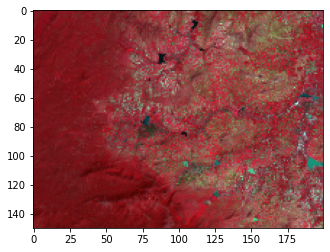

In [34]:
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import os

#drive.mount('/content/gdrive')

band2 = plt.imread("/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/band2.tif")
band3 = plt.imread("/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/band3.tif")
band4 = plt.imread("/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/band4.tif")
foo = np.empty((band2.shape[0], band2.shape[1], 3))

foo[:,:,2] = (band2-np.nanmin(band2))/(np.nanmax(band2)-np.nanmin(band2))
foo[:,:,1] = (band3-np.nanmin(band3))/(np.nanmax(band3)-np.nanmin(band3))
foo[:,:,0] = (band4-np.nanmin(band4))/(np.nanmax(band4)-np.nanmin(band4))

plt.imshow(foo, interpolation='hanning')
plt.show()

*pcolor* stands for pseudo color, and is used to increase the contrast in the data while making plots. The colorbar is used to show the colormap. The type of colormap is controlled by using the cmap as input to pcolor. Below figure shows the pseudo color plot.

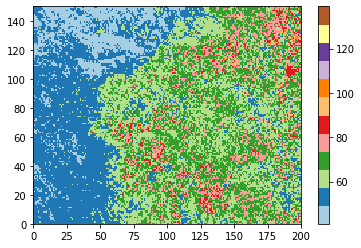

In [35]:
plt.pcolor(band2, cmap=plt.cm.Paired)
plt.colorbar()
plt.ylim(ymax=band2.shape[0])
plt.show()

We will be using the band2 data to make the contours. Since the *band2* data has very hight spatial variability, we will be first filtering it using median filter.

In [36]:
from scipy.signal import medfilt2d
data = medfilt2d(band2, kernel_size=7)

*plt.contour* is used to make contours. By default it does not show the contour values, to show the contour labels, we use the *plt.clabel*. Below figure shows the contour plot along with contour labels.

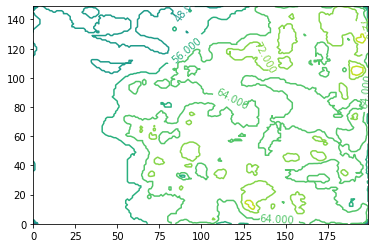

In [37]:
CS = plt.contour(data,10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

*plt.contour* provides the empty contour, i.e. there is no color between successive contours. We can use *contourf* to make filled contour plots. Below figure shows the filled contour plot.

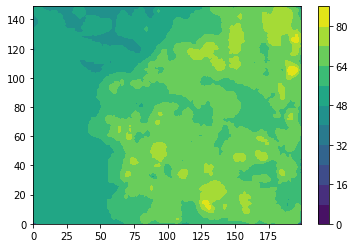

In [38]:
plt.contourf(data,10)
plt.colorbar()
plt.show()